### Part I - Reddit Data Collection


In [1]:
### import praw
import datetime
import csv
import praw
import os
from pathlib import Path
import nltk

#subreddit name list
print(submission.title)

Enter URLhttps://www.reddit.com/r/india/comments/g70l6e/gulf_news_editor_in_dubai_receives_threats_from/
Gulf News editor in Dubai receives threats from BJP’s IT cell and verified accounts


### Reading of CSV File & print the following


In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv("india.csv ")
df.flair_name=pd.Categorical(df.flair_name)
df['flair']=df.flair_name.cat.codes
df

,flair_name,title,flair
0,Politics,Mumbai Police Meri Jaan,8
1,Politics,Two lenses,8
2,Politics,Arnab Goswami alleges physical assault by Cong...,8
3,Politics,"Give Us Kerala Model Over Gujarat Model, Any D...",8
4,Politics,"""BJP Continues To Spread Virus Of Communal Pre...",8
...,...,...,...
243,Policy/Economy,Health Ministry wants export of anti-TB drug p...,7
244,Coronavirus,Mumbai Hospital Issues Notice To Docs On Strik...,3
245,Non-Political,I'm really in deep trouble right now.,5
246,Business/Finance,By crowdfunding benefits for embattled workers...,1


### Part II- Exploratory Data Analysis
This analysis is done on terms of graph.

The first graph describes the relation b/w each Flair_name and the no of posts.
this means that how many Post of a particular Flair_name exists. 

Coronavirus           92
Politics              48
Non-Political         35
AskIndia              25
Policy/Economy        22
Business/Finance      14
Science/Technology     3
Sports                 2
Scheduled              2
Photography            2
CAA-NRC-NPR            2
Food                   1
Name: flair_name, dtype: int64

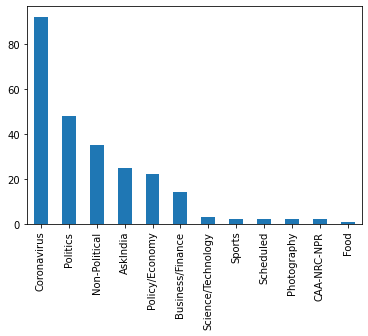

In [3]:
import matplotlib.pyplot as plt
flair_count = pd.value_counts(df.flair_name)
flair_count.plot(kind="bar")
flair_count

This graph shows the occurance of the different word in the post_title.

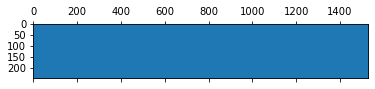

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
data_x=df.title
data_y=df.flair
cv=TfidfVectorizer(min_df=1)
X=cv.fit_transform(data_x)
Y=data_y.astype(int)
plt.spy(X)

### Part III - Flare Detector


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=4)
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
title=input("Enter the title : ")
title=cv.transform([title])
index=mnb.predict(title)
index=int(index)
result=data.flair_name.cat.categories[index]

Enter the title : xcvdsv


NameError: name 'data' is not defined

### Performance of Classifier


1)How well it works?
:-The flare detector works very well and accurate.


2)What is it good at?
:-It is accurate in classifying the posts from the r/india through csv file.


3)What is it bad at?
:-When there is very huge imbalance dataset the classifier works but it is not so accurate. 